In [64]:
# importing libraries
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout

import matplotlib.pyplot as plt
import h5py

In [2]:
# Loading train and test data
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# shape of training data
X_train.shape

(60000, 28, 28)

There are 60000 images of shape 28x28 pixels

In [4]:
# shape of testing data
X_test.shape

(10000, 28, 28)

There are 10000 images of shape 28x28 pixels

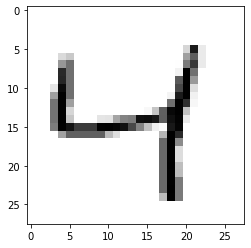

In [5]:
# sample image
plt.imshow(X_train[2],cmap='Greys')
plt.show()

In [6]:
# checking the range of pixels
print("Pixels values :")
print("Min : ",X_train[1].min())
print("Max : ",X_train[1].max())

Pixels values :
Min :  0
Max :  255


In [7]:
# Reshaping the array of images to 4 Dims to make it work with Keras
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [8]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
# Normalizing by dividing with 255
X_train /= 255
X_test /= 255

In [10]:
# checking the range of pixels
print("Pixels values :")
print("Min : ",X_train[1].min())
print("Max : ",X_train[1].max())

Pixels values :
Min :  0.0
Max :  1.0


In [65]:
# Instantiating Sequential object 
classifier = Sequential()

In [66]:
# 1st convolution layer
classifier.add(Conv2D(filters=8,kernel_size=[3,3],activation='relu',input_shape=(28,28,1)))
classifier.add(MaxPool2D(pool_size=(2,2)))

In [67]:
# 2nd convolution layer
classifier.add(Conv2D(filters=16,kernel_size=[3,3],activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

In [68]:
# Flattening
classifier.add(Flatten())

In [69]:
# Adding Fully Connected NN layers

# First hidden layer
classifier.add(Dense(64,activation='relu'))
Dropout(rate=0.01)
# Second hidden layer
classifier.add(Dense(128,activation='relu'))
Dropout(rate=0.01)

# output layer
classifier.add(Dense(10,activation='softmax'))

In [70]:
# compiling 
classifier.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [71]:
# Fitting the model
classifier.fit(X_train,y_train,epochs=15)

Epoch 1/15
60000/60000 [==============================] - 20s 333us/step - loss: 0.2057 - accuracy: 0.9368
Epoch 2/15
60000/60000 [==============================] - 20s 330us/step - loss: 0.0659 - accuracy: 0.9794
Epoch 3/15
60000/60000 [==============================] - 20s 336us/step - loss: 0.0492 - accuracy: 0.9845
Epoch 4/15
60000/60000 [==============================] - 19s 318us/step - loss: 0.0392 - accuracy: 0.9876
Epoch 5/15
60000/60000 [==============================] - 19s 324us/step - loss: 0.0311 - accuracy: 0.9899
Epoch 6/15
60000/60000 [==============================] - 19s 323us/step - loss: 0.0277 - accuracy: 0.9910
Epoch 7/15
60000/60000 [==============================] - 19s 322us/step - loss: 0.0226 - accuracy: 0.9925
Epoch 8/15
60000/60000 [==============================] - 19s 319us/step - loss: 0.0191 - accuracy: 0.9934
Epoch 9/15
60000/60000 [==============================] - 20s 328us/step - loss: 0.0165 - accuracy: 0.9947
Epoch 10/15
60000/60000 [============

In [73]:
# Evaluating on test set
classifier.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 102us/step


[0.04667782004012368, 0.9886000156402588]

With this Model we have acheived 98.8% accuracy on the test set.